In [1]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('/content/insurance_data.csv')

In [6]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
data.isnull().sum()

,0
age,0
bought_insurance,0


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [13]:
import matplotlib.pyplot as plt

In [16]:
stat=data.describe()
stat

,age,bought_insurance
count,26.000000,26.000000
mean,40.500000,0.538462
std,15.438264,0.508391
min,18.000000,0.000000
25%,25.250000,0.000000
50%,45.500000,1.000000
75%,54.750000,1.000000
max,62.000000,1.000000


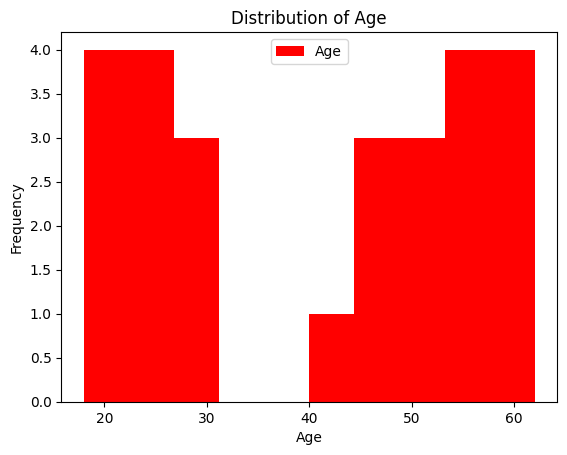

In [21]:

plt.hist(data.age, bins=10, color='red', label='Age')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.legend()
plt.show()

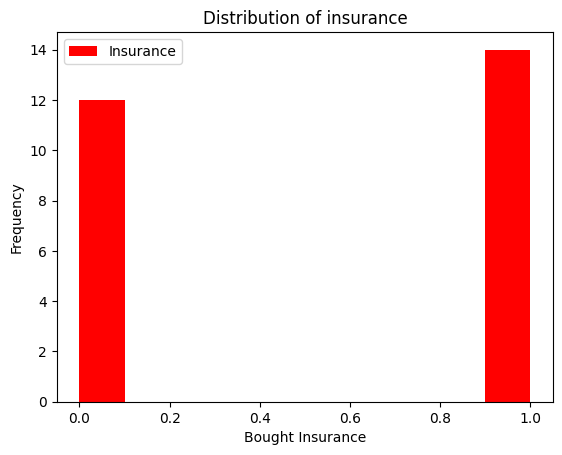

In [24]:
plt.hist(data.bought_insurance, bins=10, color='red', label='Insurance')

plt.xlabel('Bought Insurance')
plt.ylabel('Frequency')
plt.title('Distribution of insurance')
plt.legend()
plt.show()

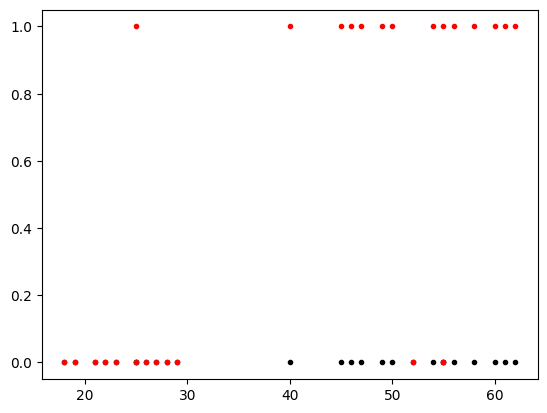

In [27]:
plt.scatter(data.age, np.zeros_like(data.age), marker='.', color='black', label='Data Points')
plt.scatter(data.age, data.bought_insurance, marker='.', color='red')

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(data[['age']],data.bought_insurance,test_size=0.2)

In [31]:
X_test

,age
25,54
4,46
1,25
18,19
20,21
22,40


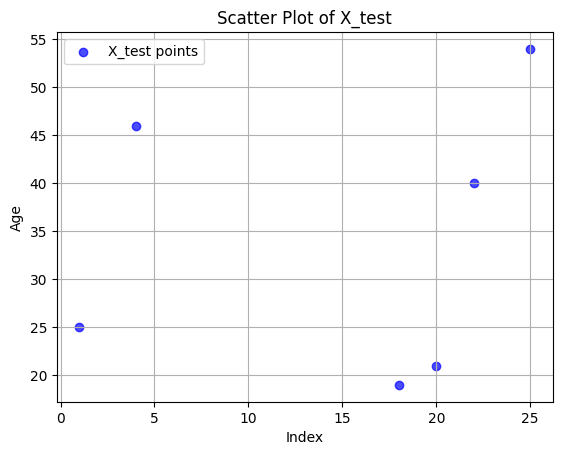

In [34]:
plt.scatter(X_test.index, X_test['age'], color='b', alpha=0.7, label='X_test points') # Use .index for x-axis and column name for y-axis
plt.title("Scatter Plot of X_test")
plt.xlabel("Index") # Update x-axis label
plt.ylabel("Age") # Update y-axis label
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 0])

In [39]:
y_test

,bought_insurance
25,1
4,1
1,0
18,0
20,0
22,1


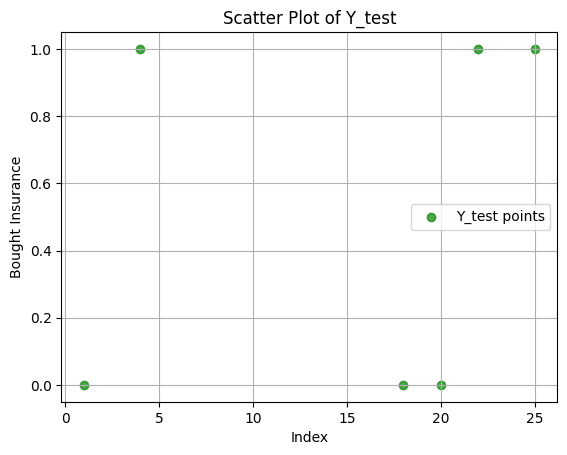

In [45]:
plt.scatter(y_test.index, y_test.values, color='g', alpha=0.7, label='Y_test points')
plt.title("Scatter Plot of Y_test")
plt.xlabel("Index")
plt.ylabel("Bought Insurance")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
accuracy=model.score(X_test,y_test)
accuracy

0.8333333333333334

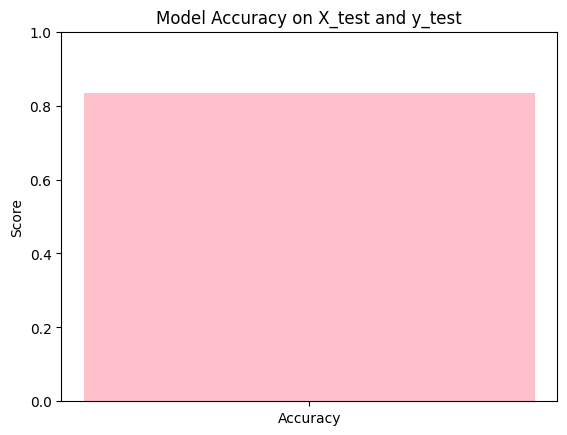

In [51]:
plt.bar(['Accuracy'], [accuracy], color='pink')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title("Model Accuracy on X_test and y_test")
plt.ylabel("Score")
plt.show()

In [53]:
model.predict_proba(X_test)

array([[0.16763795, 0.83236205],
       [0.33798482, 0.66201518],
       [0.85438523, 0.14561477],
       [0.92179921, 0.07820079],
       [0.9033055 , 0.0966945 ],
       [0.50633529, 0.49366471]])

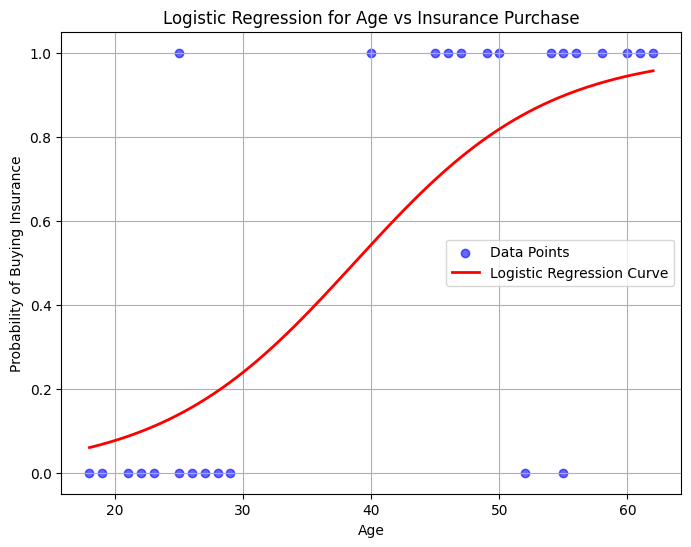

In [55]:
model = LogisticRegression()

X = data[['age']].values  # Ensure X is 2D
y = data['bought_insurance'].values  # Ensure y is 1D

model.fit(X, y)

# Generate ages for plotting the curve
age_range = np.linspace(data['age'].min(), data['age'].max(), 300).reshape(-1, 1)
predicted_probs = model.predict_proba(age_range)[:, 1]

# Plot the data points and logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['bought_insurance'], color='blue', label='Data Points', alpha=0.6)
plt.plot(age_range, predicted_probs, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression for Age vs Insurance Purchase')
plt.legend()
plt.grid(True)
plt.show()
